# Notebook pour le tracé de l'évolution du front

Le but ici est de plot les évolutions $\xi=f(t)$ grâce au travail préalablement fait sur ImageJ

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import scienceplots
from matplotlib.ticker import FuncFormatter
import matplotlib.lines as mlines

# Fonction pour formater les labels des axes avec un nombre de décimales personnalisable
def custom_formatter(x, pos, deci=1):
    if x == 0:
        return '0'
    else:
        format_string = f'{{:.{deci}f}}'
        return format_string.format(x)

plt.rcParams.update({
    'font.size': 14,       # Taille de police générale
    'axes.titlesize': 19,  # Taille de la police du titre des axes
    'axes.labelsize': 16,  # Taille de la police des étiquettes des axes
    'xtick.labelsize': 13, # Taille de la police des étiquettes des graduations en x
    'ytick.labelsize': 13, # Taille de la police des étiquettes des graduations en y
    'legend.fontsize': 13, # Taille de la police de la légende
    'figure.titlesize': 20 # Taille de la police du titre de la figure
})

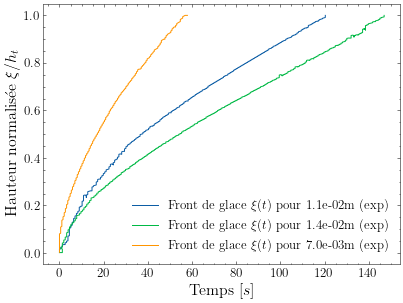

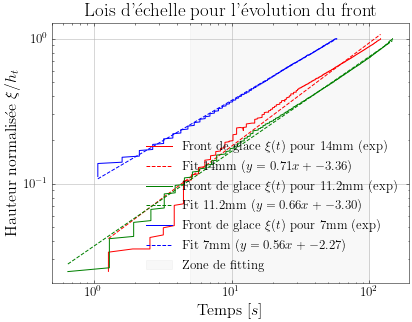

In [2]:
# Function to process image and extract contour data
def process_image(image_path, height_in_meters, length_in_time):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Erreur : l'image n'a pas été chargée. Vérifiez le chemin de l'image {image_path}.")
    
    flipped_image = cv2.flip(image, 0)
    height, width = flipped_image.shape
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key=cv2.contourArea)
    contour_x = contour[:, 0, 0]
    contour_y = height - contour[:, 0, 1]
    contour_y_meters = contour_y * height_in_meters / height
    contour_x_sec = contour_x * length_in_time / width
    
    return flipped_image, contour_x_sec, contour_y_meters

# Process each image and store the results
results = [
    process_image('Reslices obtenus/DSC_7059/DSC_7059.png', 0.0112, 121),
    process_image('Reslices obtenus/DSC_7083/DSC_7083_binary.png', 0.014, 160),
    process_image('Reslices obtenus/DSC_7041/7041_binary.png', 0.007, 59)
]

# Courbe hauteur normalisé - temps
with plt.style.context('science'):
    plt.figure(figsize=[6.4, 4.8])
    for flipped_image, contour_x_sec, contour_y_meters in results:
        plt.plot(contour_x_sec[1:], contour_y_meters[1:] / max(contour_y_meters), label=f'Front de glace $\\xi(t)$ pour {max(contour_y_meters):.1e}m (exp)')
    plt.xlabel(r"Temps [$s$]")
    plt.ylabel(r'Hauteur normalisée  $\xi/h_t$')
    plt.legend()
    plt.savefig("Evolution_du_front_normalisée.svg")
    plt.show()

# Courbe log-log et régressiona affine
def log_fit(contour_x_sec, contour_y_meters, height_in_meters):
    log_x = np.log(contour_x_sec[5:])
    log_y = np.log((contour_y_meters / height_in_meters)[5:])
    fit = np.polyfit(log_x, log_y, 1)
    slope, intercept = fit
    fit_y = np.exp(intercept) * contour_x_sec[5:]**slope
    return slope, intercept, fit_y

fits = [log_fit(contour_x_sec, contour_y_meters, max(contour_y_meters)) for _, contour_x_sec, contour_y_meters in results]

# Plot log-log with fits
with plt.style.context('science'):
    plt.figure(figsize=[6.4, 4.8])
    colors = ['r-', 'g-', 'b-']
    labels = ['14mm', '11.2mm', '7mm']
    for (flipped_image, contour_x_sec, contour_y_meters), (slope, intercept, fit_y), color, label in zip(results, fits, colors, labels):
        plt.loglog(contour_x_sec[5:], (contour_y_meters / max(contour_y_meters))[5:], color, label=f'Front de glace $\\xi(t)$ pour {label} (exp)')
        plt.loglog(contour_x_sec[5:], fit_y, f'{color[0]}--', label=f'Fit {label} ($y={slope:.2f}x + {intercept:.2f}$)')
    
    plt.axvspan(5,100, label='Zone de fitting', alpha=0.05, color='gray')
    
    plt.grid()
    plt.xlabel(r"Temps [$s$]")
    plt.ylabel(r'Hauteur normalisée  $\xi/h_t$')
    plt.title("Lois d'échelle pour l'évolution du front")
    plt.legend()
    #plt.savefig("Évolution_du_front_normalisée_log_log.svg")
    plt.show()



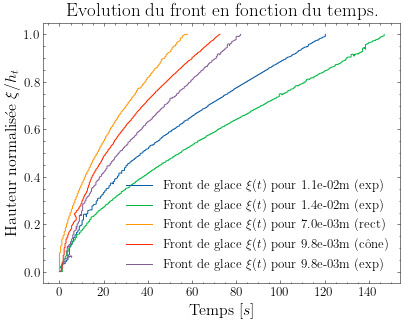

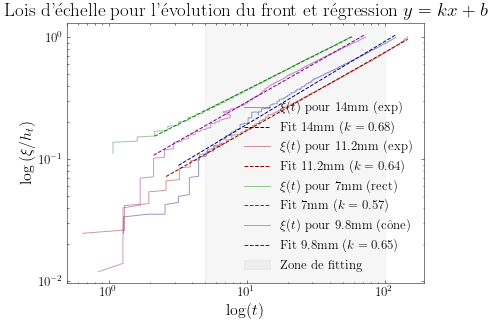

In [17]:
# Function to process image and extract contour data
def process_image_label(image_path, height_in_meters, length_in_time, type_):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Erreur : l'image n'a pas été chargée. Vérifiez le chemin de l'image {image_path}.")
    
    flipped_image = cv2.flip(image, 0)
    height, width = flipped_image.shape
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key=cv2.contourArea)
    contour_x = contour[:, 0, 0]
    contour_y = height - contour[:, 0, 1]
    contour_y_meters = contour_y * height_in_meters / height
    contour_x_sec = contour_x * length_in_time / width
    
    return flipped_image, contour_x_sec, contour_y_meters, type_

def process_image(image_path, height_in_meters, length_in_time):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Erreur : l'image n'a pas été chargée. Vérifiez le chemin de l'image {image_path}.")
    
    flipped_image = cv2.flip(image, 0)
    height, width = flipped_image.shape
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key=cv2.contourArea)
    contour_x = contour[:, 0, 0]
    contour_y = height - contour[:, 0, 1]
    contour_y_meters = contour_y * height_in_meters / height
    contour_x_sec = contour_x * length_in_time / width
    
    return flipped_image, contour_x_sec, contour_y_meters

# Process each image and store the results
results_label = [
    process_image_label('Reslices obtenus/DSC_7059/DSC_7059.png', 0.0112, 121, 'exp'),
    process_image_label('Reslices obtenus/DSC_7083/DSC_7083_binary.png', 0.014, 160, 'exp'),
    process_image_label('Reslices obtenus/DSC_7041/7041_binary.png', 0.007, 59, 'rect'),
    process_image_label('Reslices obtenus/DSC_7070/7070_binary.png', 0.0098, 87, 'cône'),
    process_image_label('Reslices obtenus/DSC_7081/7081_binary.png', 0.0098, 95, 'exp')
]

results = [
    process_image('Reslices obtenus/DSC_7059/DSC_7059.png', 0.0112, 121),
    process_image('Reslices obtenus/DSC_7083/DSC_7083_binary.png', 0.014, 160),
    process_image('Reslices obtenus/DSC_7041/7041_binary.png', 0.007, 59),
    process_image('Reslices obtenus/DSC_7070/7070_binary.png', 0.0098, 100)
    #process_image_label('Reslices obtenus/DSC_7081/7081_binary.png', 0.0098, 60+37, 'exp')
]

# Courbe hauteur normalisé - temps
with plt.style.context('science'):
    plt.figure(figsize=[6.4, 4.8])
    for flipped_image, contour_x_sec, contour_y_meters, type_ in results_label:
        plt.plot(contour_x_sec[1:], contour_y_meters[1:] / max(contour_y_meters), label=f'Front de glace $\\xi(t)$ pour {max(contour_y_meters):.1e}m ({type_})')
    plt.xlabel(r"Temps [$s$]")
    plt.ylabel(r'Hauteur normalisée  $\xi/h_t$')
    plt.legend()
    plt.title("Evolution du front en fonction du temps.")
    #plt.savefig("Evolution_du_front_normalisée2.svg")
    plt.show()

# Courbe log-log et régressiona affine
def log_fit(contour_x_sec, contour_y_meters, height_in_meters):
    log_x = np.log(contour_x_sec[10:])
    log_y = np.log((contour_y_meters / height_in_meters)[10:])
    fit = np.polyfit(log_x, log_y, 1)
    slope, intercept = fit
    fit_y = np.exp(intercept) * contour_x_sec[10:]**slope
    return slope, intercept, fit_y

fits = [log_fit(contour_x_sec, contour_y_meters, max(contour_y_meters)) for _, contour_x_sec, contour_y_meters in results]

# Plot log-log with fits
with plt.style.context('science'):
    plt.figure(figsize=[6.4, 4.8])
    couleurs = ['navy', 'darkred', 'green', 'purple', 'orange']
    labels = ['14mm', '11.2mm', '7mm', '9.8mm']
    i = 0
    for (flipped_image, contour_x_sec, contour_y_meters, type_), (slope, intercept, fit_y), label in zip(results_label, fits, labels):
        plt.loglog(contour_x_sec[5:], (contour_y_meters / max(contour_y_meters))[5:], couleurs[i%5], linestyle='-', label=f'$\\xi(t)$ pour {label} ({type_})', alpha=0.4)
        plt.loglog(contour_x_sec[10:], fit_y, linestyle='--', color=couleurs[i%5], label=f'Fit {label} ($k={slope:.2f}$)')
        i += 1
        
    plt.axvspan(5,100, label='Zone de fitting', alpha=0.1, color='darkgray')
    
    #plt.grid()
    plt.xlabel(r"$\log(t)$")
    plt.ylabel(r'$\log\left(\xi/h_t\right)$')
    plt.title("Lois d'échelle pour l'évolution du front et régression $y=kx+b$")
    plt.legend()
    #plt.savefig("Evolution_du_front_normalisée_log_log2.svg")
    plt.show()



## Comparaison front théorique et expérimentale avec double normalisation

In [18]:
D = 1.203e-6

cp = 2060
L = 333e3

St = cp*110/L
print(St)

0.6804804804804805


36.22225299950827
Necessary Checking Incoming >>>
Hauteur de l'hydrogel expérimental : 0.007 m
Validité : True


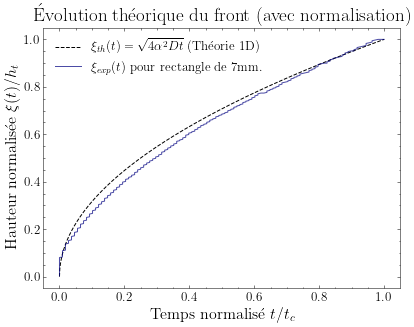

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from scipy.special import erf
import scienceplots

# Constants
B = St  # Example value, adjust as needed # Example value, adjust as needed

# Function to solve for alpha
def solve_alpha(B):
    def equation(alpha):
        return B - np.sqrt(np.pi) * alpha * np.exp(alpha**2) * erf(alpha)
    alpha_initial_guess = 1
    alpha_solution = fsolve(equation, alpha_initial_guess)
    return alpha_solution[0]

# Calculate alpha
alpha = solve_alpha(B)

# Theoretical curve h(t) = sqrt(4 * alpha**2 * D * t)
def h_theoretical(t, alpha, D):
    return np.sqrt(4 * alpha**2 * D * t)

# Determine the maximum time for which h(t) <= 0.007
h_max = 0.007
t_max = (h_max**2) / (4 * alpha**2 * D)

print(t_max)

# Generate time values for theoretical curve
time_values = np.linspace(0, t_max, 1000)
h_t_values = h_theoretical(time_values, alpha, D)

print("Necessary Checking Incoming >>>")
print("Hauteur de l'hydrogel expérimental :", np.max(contour_y_meters), "m")
print("Validité :", np.max(contour_y_meters) == 0.007)

# Plot theoretical curve
with plt.style.context('science'):
    plt.figure(figsize=[6.4, 4.8])
    plt.plot(time_values/t_max, h_t_values/np.max(h_t_values), 'k--', label=r'$\xi_{th}(t) = \sqrt{4 \alpha^2 D t}$ (Théorie 1D)', linewidth=1, color='black')
    plt.plot(contour_x_sec[1:]/np.max(contour_x_sec), contour_y_meters[1:]/np.max(contour_y_meters), label=r'$\xi_{exp}(t)$ pour rectangle de $7$mm.', color='navy', linewidth=1, alpha=0.7)
    
    #plt.plot(time_values, h_t_values, 'k--', label=r'$\xi_{th}(t) = \sqrt{4 \alpha^2 D t}$', linewidth=2, color='darkred')
    #plt.plot(contour_x_sec[1:], contour_y_meters[1:], label=r'$\xi_{exp}(t)$ pour rectangle de $7$mm.', color='navy', linewidth=2)
    
    plt.ylabel(r"Hauteur normalisée $\xi(t)/h_t$")
    plt.xlabel(r'Temps normalisé $t/t_c$')
    plt.title("Évolution théorique du front (avec normalisation)")
    plt.legend()
    #plt.savefig("Comparaison 1D et expérience_Normalisé.svg")
    plt.show()


36.22225299950827
Necessary Checking Incoming >>>
Hauteur de l'hydrogel expérimental : 0.007 m
Validité : True


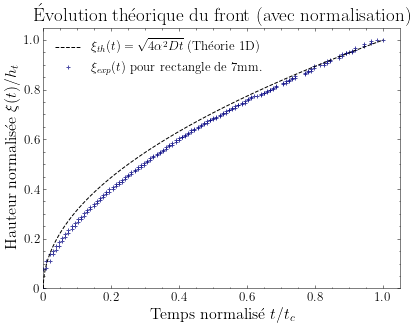

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from scipy.special import erf
import scienceplots

# Constants
B = St  # Example value, adjust as needed # Example value, adjust as needed

# Function to solve for alpha
def solve_alpha(B):
    def equation(alpha):
        return B - np.sqrt(np.pi) * alpha * np.exp(alpha**2) * erf(alpha)
    alpha_initial_guess = 1
    alpha_solution = fsolve(equation, alpha_initial_guess)
    return alpha_solution[0]

# Calculate alpha
alpha = solve_alpha(B)

# Theoretical curve h(t) = sqrt(4 * alpha**2 * D * t)
def h_theoretical(t, alpha, D):
    return np.sqrt(4 * alpha**2 * D * t)

# Determine the maximum time for which h(t) <= 0.007
h_max = 0.007
t_max = (h_max**2) / (4 * alpha**2 * D)

print(t_max)

# Generate time values for theoretical curve
time_values = np.linspace(0, t_max, 1000)
h_t_values = h_theoretical(time_values, alpha, D)

print("Necessary Checking Incoming >>>")
print("Hauteur de l'hydrogel expérimental :", np.max(contour_y_meters), "m")
print("Validité :", np.max(contour_y_meters) == 0.007)


# Plot theoretical curve
with plt.style.context('science'):
    
    plt.figure(figsize=[6.4, 4.8])
    
    plt.xlim(0, 1.05)
    plt.ylim(0, 1.05)
    
    plt.plot(time_values/t_max, h_t_values/np.max(h_t_values), 'k--', label=r'$\xi_{th}(t) = \sqrt{4 \alpha^2 D t}$ (Théorie 1D)', linewidth=1, color='black')
    plt.scatter(contour_x_sec[1:]/np.max(contour_x_sec), contour_y_meters[1:]/np.max(contour_y_meters), label=r'$\xi_{exp}(t)$ pour rectangle de $7$mm.', color='navy', alpha=0.7, s = 15,
               marker='+')
    
    #plt.plot(time_values, h_t_values, 'k--', label=r'$\xi_{th}(t) = \sqrt{4 \alpha^2 D t}$', linewidth=2, color='darkred')
    #plt.plot(contour_x_sec[1:], contour_y_meters[1:], label=r'$\xi_{exp}(t)$ pour rectangle de $7$mm.', color='navy', linewidth=2)
    
    
    # Appliquer le formatage personnalisé aux axes X et Y
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: custom_formatter(x, pos, deci=1)))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: custom_formatter(x, pos, deci=1)))
    
    plt.ylabel(r"Hauteur normalisée $\xi(t)/h_t$")
    plt.xlabel(r'Temps normalisé $t/t_c$')
    plt.title("Évolution théorique du front (avec normalisation)")
    plt.legend()
    plt.savefig("Comparaison 1D et expérience_Normalisé_c.pdf")
    plt.show()


Necessary Checking Incoming >>>
Hauteur de l'hydrogel expérimental : 0.007 m
Validité : True


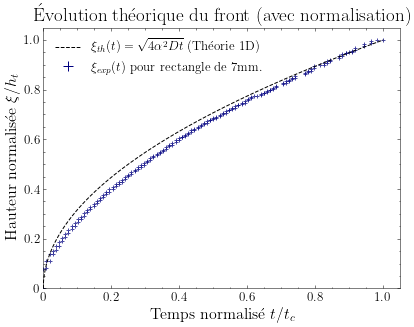

In [24]:
# Plot theoretical curve

print("Necessary Checking Incoming >>>")
print("Hauteur de l'hydrogel expérimental :", np.max(contour_y_meters), "m")
print("Validité :", np.max(contour_y_meters) == 0.007)

with plt.style.context('science'):
    
    plt.figure(figsize=[6.4, 4.8])
    
    plt.xlim(0, 1.05)
    plt.ylim(0, 1.05)
    
    plt.plot(time_values/t_max, h_t_values/np.max(h_t_values), 'k--', label=r'$\xi_{th}(t) = \sqrt{4 \alpha^2 D t}$ (Théorie 1D)', linewidth=1, color='black')
    
    # Scatter plot with customized marker size
    plt.scatter(contour_x_sec[1:]/np.max(contour_x_sec), contour_y_meters[1:]/np.max(contour_y_meters), 
                label=r'$\xi_{exp}(t)$ pour rectangle de $7$mm.', color='navy', alpha=0.7, s=15, marker='+')
    
    # Ajouter un élément légendaire avec une taille de marqueur différente
    legend_elements = [
        mlines.Line2D([], [], color='black', linestyle='--', label=r'$\xi_{th}(t) = \sqrt{4 \alpha^2 D t}$ (Théorie 1D)'),
        mlines.Line2D([], [], color='navy', marker='+', linestyle='None', markersize=10, label=r'$\xi_{exp}(t)$ pour rectangle de $7$mm.')
    ]
    
    # Appliquer le formatage personnalisé aux axes X et Y
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: custom_formatter(x, pos, deci=1)))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: custom_formatter(x, pos, deci=1)))
    
    plt.ylabel(r"Hauteur normalisée $\xi/h_t$")
    plt.xlabel(r'Temps normalisé $t/t_c$')
    plt.title("Évolution théorique du front (avec normalisation)")
    
    # Utiliser les éléments personnalisés pour la légende
    plt.legend(handles=legend_elements, loc='upper left')
    plt.savefig("Comparaison_1D_et_exp_Normalisé_c.pdf")
    plt.show()

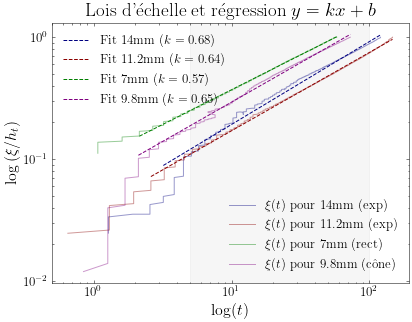

In [73]:
with plt.style.context('science'):
    plt.figure(figsize=[6.4, 4.8])
    couleurs = ['navy', 'darkred', 'green', 'purple', 'orange']
    labels = ['14mm', '11.2mm', '7mm', '9.8mm']
    fit_handles = []
    curve_handles = []
    
    i = 0
    for (flipped_image, contour_x_sec, contour_y_meters, type_), (slope, intercept, fit_y), color, label in zip(results_label, fits, couleurs, labels):
        curve, = plt.loglog(contour_x_sec[5:], (contour_y_meters / max(contour_y_meters))[5:], color=couleurs[i%5], linestyle='-', label=f'$\\xi(t)$ pour {label} ({type_})', alpha=0.4)
        fit, = plt.loglog(contour_x_sec[10:], fit_y, linestyle='--', color=couleurs[i%5], label=f'Fit {label} ($k={slope:.2f}$)')
        curve_handles.append(curve)
        fit_handles.append(fit)
        i += 1
    
    plt.axvspan(5, 100, label='Zone de fitting', alpha=0.1, color='darkgray')
    
    plt.xlabel(r"$\log(t)$")
    plt.ylabel(r'$\log\left(\xi/h_t\right)$')
    plt.title("Lois d'échelle et régression $y=kx+b$")
    
    # Ajouter la légende des courbes en bas
    first_legend = plt.legend(handles=curve_handles, loc='lower right')
    plt.gca().add_artist(first_legend)

    # Ajouter la légende des fits en haut
    plt.legend(handles=fit_handles, loc='upper left')
    
    #plt.savefig("Evolution_du_front_normalisée_log_log2.svg")
    plt.show()

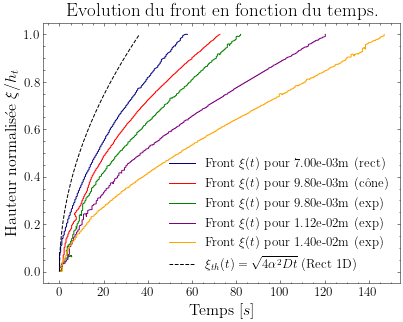

In [40]:
# Function to process image and extract contour data
def process_image_label(image_path, height_in_meters, length_in_time, type_):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Erreur : l'image n'a pas été chargée. Vérifiez le chemin de l'image {image_path}.")
    
    flipped_image = cv2.flip(image, 0)
    height, width = flipped_image.shape
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key=cv2.contourArea)
    contour_x = contour[:, 0, 0]
    contour_y = height - contour[:, 0, 1]
    contour_y_meters = contour_y * height_in_meters / height
    contour_x_sec = contour_x * length_in_time / width
    
    return flipped_image, contour_x_sec, contour_y_meters, type_

def process_image(image_path, height_in_meters, length_in_time):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Erreur : l'image n'a pas été chargée. Vérifiez le chemin de l'image {image_path}.")
    
    flipped_image = cv2.flip(image, 0)
    height, width = flipped_image.shape
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key=cv2.contourArea)
    contour_x = contour[:, 0, 0]
    contour_y = height - contour[:, 0, 1]
    contour_y_meters = contour_y * height_in_meters / height
    contour_x_sec = contour_x * length_in_time / width
    
    return flipped_image, contour_x_sec, contour_y_meters

# Process each image and store the results
results_label = [
    process_image_label('Reslices obtenus/DSC_7041/7041_binary.png', 0.007, 59, 'rect'),
    process_image_label('Reslices obtenus/DSC_7070/7070_binary.png', 0.0098, 87, 'cône'),
    process_image_label('Reslices obtenus/DSC_7081/7081_binary.png', 0.0098, 95, 'exp'),
    process_image_label('Reslices obtenus/DSC_7059/DSC_7059.png', 0.0112, 121, 'exp'),
    process_image_label('Reslices obtenus/DSC_7083/DSC_7083_binary.png', 0.014, 160, 'exp')
]


# Courbe hauteur normalisé - temps
with plt.style.context('science'):
    couleurs = ['navy', 'red', 'green', 'purple', 'orange']
    plt.figure(figsize=[6.4, 4.8])
    
    i=0
    for flipped_image, contour_x_sec, contour_y_meters, type_ in results_label:
        plt.plot(contour_x_sec[1:], contour_y_meters[1:] / max(contour_y_meters), label=f'Front $\\xi(t)$ pour {max(contour_y_meters):.2e}m ({type_})', color=couleurs[i%5])
        i+=1
    plt.plot(time_values, h_t_values/np.max(h_t_values), 'k--', label=r'$\xi_{th}(t) = \sqrt{4 \alpha^2 D t}$ (Rect 1D)', linewidth=1, color='black')
    
    plt.xlabel(r"Temps [$s$]")
    plt.ylabel(r'Hauteur normalisée  $\xi/h_t$')
    plt.legend()
    plt.title("Evolution du front en fonction du temps.")
    #plt.savefig("Evolution_du_front_normalisée2.svg")
    plt.show()


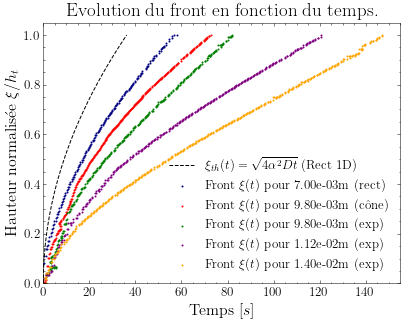

In [41]:

    
# Function to process image and extract contour data
def process_image_label(image_path, height_in_meters, length_in_time, type_):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Erreur : l'image n'a pas été chargée. Vérifiez le chemin de l'image {image_path}.")
    
    flipped_image = cv2.flip(image, 0)
    height, width = flipped_image.shape
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key=cv2.contourArea)
    contour_x = contour[:, 0, 0]
    contour_y = height - contour[:, 0, 1]
    contour_y_meters = contour_y * height_in_meters / height
    contour_x_sec = contour_x * length_in_time / width
    
    return flipped_image, contour_x_sec, contour_y_meters, type_

def process_image(image_path, height_in_meters, length_in_time):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Erreur : l'image n'a pas été chargée. Vérifiez le chemin de l'image {image_path}.")
    
    flipped_image = cv2.flip(image, 0)
    height, width = flipped_image.shape
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour = max(contours, key=cv2.contourArea)
    contour_x = contour[:, 0, 0]
    contour_y = height - contour[:, 0, 1]
    contour_y_meters = contour_y * height_in_meters / height
    contour_x_sec = contour_x * length_in_time / width
    
    return flipped_image, contour_x_sec, contour_y_meters

# Process each image and store the results
results_label = [
    process_image_label('Reslices obtenus/DSC_7041/7041_binary.png', 0.007, 59, 'rect'),
    process_image_label('Reslices obtenus/DSC_7070/7070_binary.png', 0.0098, 87, 'cône'),
    process_image_label('Reslices obtenus/DSC_7081/7081_binary.png', 0.0098, 95, 'exp'),
    process_image_label('Reslices obtenus/DSC_7059/DSC_7059.png', 0.0112, 121, 'exp'),
    process_image_label('Reslices obtenus/DSC_7083/DSC_7083_binary.png', 0.014, 160, 'exp')
]


# Courbe hauteur normalisé - temps
with plt.style.context('science'):
    couleurs = ['navy', 'red', 'green', 'purple', 'orange']
    plt.figure(figsize=[6.4, 4.8])
    
    plt.xlim(0, 155)
    plt.ylim(0, 1.05)
    
    i=0
    for flipped_image, contour_x_sec, contour_y_meters, type_ in results_label:
        plt.scatter(contour_x_sec[1:], contour_y_meters[1:] / max(contour_y_meters), label=f'Front $\\xi(t)$ pour {max(contour_y_meters):.2e}m ({type_})', color=couleurs[i%5],s=1)
        i+=1
    plt.plot(time_values, h_t_values/np.max(h_t_values), 'k--', label=r'$\xi_{th}(t) = \sqrt{4 \alpha^2 D t}$ (Rect 1D)', linewidth=1, color='black')
    
    plt.xlabel(r"Temps [$s$]")
    plt.ylabel(r'Hauteur normalisée  $\xi/h_t$')
    plt.legend()
    plt.title("Evolution du front en fonction du temps.")
    plt.savefig("Evolution_du_front_normalisée2_c.pdf")
    plt.show()


Affichage amélioré du 0

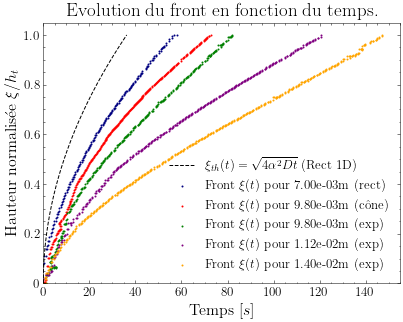

In [48]:
with plt.style.context('science'):
    couleurs = ['navy', 'red', 'green', 'purple', 'orange']
    plt.figure(figsize=[6.4, 4.8])

    plt.xlim(0, 155)
    plt.ylim(0, 1.05)
    
    i = 0
    for flipped_image, contour_x_sec, contour_y_meters, type_ in results_label:
        plt.scatter(contour_x_sec[1:], contour_y_meters[1:] / max(contour_y_meters), 
                    label=f'Front $\\xi(t)$ pour {max(contour_y_meters):.2e}m ({type_})', 
                    color=couleurs[i%5], s=1)
        i += 1

    plt.plot(time_values, h_t_values / np.max(h_t_values), 'k--', 
             label=r'$\xi_{th}(t) = \sqrt{4 \alpha^2 D t}$ (Rect 1D)', 
             linewidth=1, color='black')

    # Appliquer le formatage personnalisé aux axes X et Y
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: custom_formatter(x, pos, deci=0)))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: custom_formatter(x, pos, deci=1)))

    plt.xlabel(r"Temps [$s$]")
    plt.ylabel(r'Hauteur normalisée  $\xi/h_t$')
    plt.legend()
    plt.title("Evolution du front en fonction du temps.")
    plt.savefig("Evolution_du_front_normalisée2_c.pdf")
    plt.show()


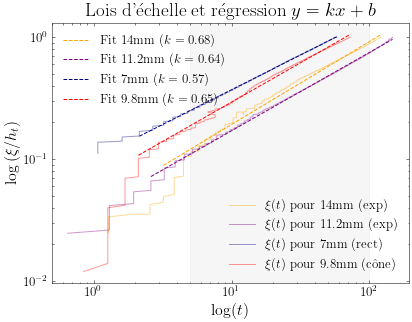

In [74]:
with plt.style.context('science'):
    plt.figure(figsize=[6.4, 4.8])
    couleurs = ['orange', 'purple', 'navy', 'red', 'orange']
    labels = ['14mm', '11.2mm', '7mm', '9.8mm']
    fit_handles = []
    curve_handles = []
    
    i = 0
    for (flipped_image, contour_x_sec, contour_y_meters, type_), (slope, intercept, fit_y), color, label in zip(results_label, fits, couleurs, labels):
        curve, = plt.loglog(contour_x_sec[5:], (contour_y_meters / max(contour_y_meters))[5:], color=couleurs[i%5], linestyle='-', label=f'$\\xi(t)$ pour {label} ({type_})', alpha=0.4)
        fit, = plt.loglog(contour_x_sec[10:], fit_y, linestyle='--', color=couleurs[i%5], label=f'Fit {label} ($k={slope:.2f}$)')
        curve_handles.append(curve)
        fit_handles.append(fit)
        i += 1
    
    plt.axvspan(5, 100, label='Zone de fitting', alpha=0.1, color='darkgray')
    
    plt.xlabel(r"$\log(t)$")
    plt.ylabel(r'$\log\left(\xi/h_t\right)$')
    plt.title("Lois d'échelle et régression $y=kx+b$")
    
    # Ajouter la légende des courbes en bas
    first_legend = plt.legend(handles=curve_handles, loc='lower right')
    plt.gca().add_artist(first_legend)

    # Ajouter la légende des fits en haut
    plt.legend(handles=fit_handles, loc='upper left')
    
    plt.savefig("Evolution_du_front_normalisée_log_log2.svg")
    plt.show()

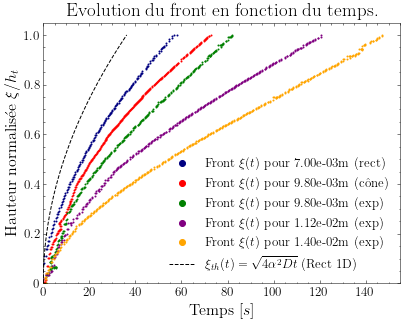

In [30]:
# Process each image and store the results
results_label = [
    process_image_label('Reslices obtenus/DSC_7041/7041_binary.png', 0.007, 59, 'rect'),
    process_image_label('Reslices obtenus/DSC_7070/7070_binary.png', 0.0098, 87, 'cône'),
    process_image_label('Reslices obtenus/DSC_7081/7081_binary.png', 0.0098, 95, 'exp'),
    process_image_label('Reslices obtenus/DSC_7059/DSC_7059.png', 0.0112, 121, 'exp'),
    process_image_label('Reslices obtenus/DSC_7083/DSC_7083_binary.png', 0.014, 160, 'exp')
]

# Courbe hauteur normalisée - temps
with plt.style.context('science'):
    couleurs = ['navy', 'red', 'green', 'purple', 'orange']
    plt.figure(figsize=[6.4, 4.8])

    plt.xlim(0, 155)
    plt.ylim(0, 1.05)

    legend_elements = []
    i = 0
    for flipped_image, contour_x_sec, contour_y_meters, type_ in results_label:
        plt.scatter(contour_x_sec[1:], contour_y_meters[1:] / max(contour_y_meters), 
                    label=f'Front $\\xi(t)$ pour {max(contour_y_meters):.2e}m ({type_})', 
                    color=couleurs[i % 5], s=1)
        
        # Créer un point plus gros pour la légende
        legend_elements.append(mlines.Line2D([], [], color=couleurs[i % 5], marker='o', linestyle='None', markersize=6, label=f'Front $\\xi(t)$ pour {max(contour_y_meters):.2e}m ({type_})'))
        i += 1

    # Ajout de la courbe théorique avec une ligne en pointillés
    plt.plot(time_values, h_t_values / np.max(h_t_values), 'k--', 
             label=r'$\xi_{th}(t) = \sqrt{4 \alpha^2 D t}$ (Rect 1D)', 
             linewidth=1, color='black')

    # Ajouter l'entrée pour la courbe théorique à la légende
    legend_elements.append(mlines.Line2D([], [], color='black', linestyle='--', markersize=6, label=r'$\xi_{th}(t) = \sqrt{4 \alpha^2 D t}$ (Rect 1D)'))

    # Appliquer le formatage personnalisé aux axes X et Y
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: custom_formatter(x, pos, deci=0)))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: custom_formatter(x, pos, deci=1)))

    plt.xlabel(r"Temps [$s$]")
    plt.ylabel(r'Hauteur normalisée  $\xi/h_t$')
    plt.legend(handles=legend_elements, loc='lower right')  # Légende en bas à droite
    plt.title("Evolution du front en fonction du temps.")
    plt.savefig("Evolution_du_front_normalisée2_c.pdf")
    plt.show()

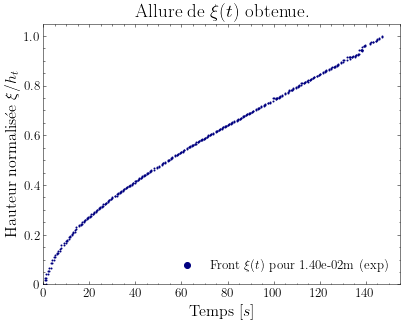

In [29]:
# Process each image and store the results
results_label = [
    process_image_label('Reslices obtenus/DSC_7083/DSC_7083_binary.png', 0.014, 160, 'exp')
]

# Courbe hauteur normalisée - temps
with plt.style.context('science'):
    couleurs = ['navy', 'red', 'green', 'purple', 'orange']
    plt.figure(figsize=[6.4, 4.8])

    plt.xlim(0, 155)
    plt.ylim(0, 1.05)

    legend_elements = []
    i = 0
    for flipped_image, contour_x_sec, contour_y_meters, type_ in results_label:
        plt.scatter(contour_x_sec[1:], contour_y_meters[1:] / max(contour_y_meters), 
                    label=f'Front $\\xi(t)$ pour {max(contour_y_meters):.2e}m ({type_})', 
                    color=couleurs[i % 5], s=1)
        
        # Créer un point plus gros pour la légende
        legend_elements.append(mlines.Line2D([], [], color=couleurs[i % 5], marker='o', linestyle='None', markersize=6, label=f'Front $\\xi(t)$ pour {max(contour_y_meters):.2e}m ({type_})'))
        i += 1

    # Ajout de la courbe théorique avec une ligne en pointillés
    #plt.plot(time_values, h_t_values / np.max(h_t_values), 'k--', label=r'$\xi_{th}(t) = \sqrt{4 \alpha^2 D t}$ (Rect 1D)', linewidth=1, color='black')

    # Ajouter l'entrée pour la courbe théorique à la légende
    #legend_elements.append(mlines.Line2D([], [], color='black', linestyle='--', markersize=6, label=r'$\xi_{th}(t) = \sqrt{4 \alpha^2 D t}$ (Rect 1D)'))

    # Appliquer le formatage personnalisé aux axes X et Y
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: custom_formatter(x, pos, deci=0)))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: custom_formatter(x, pos, deci=1)))

    plt.xlabel(r"Temps [$s$]")
    plt.ylabel(r'Hauteur normalisée  $\xi/h_t$')
    plt.legend(handles=legend_elements, loc='lower right')  # Légende en bas à droite
    plt.title(r"Allure de $\xi(t)$ obtenue.")
    plt.savefig("Front_annexe.pdf")
    plt.show()